## Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [2]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

# CICDDoS2019 Dataset

In [3]:
#load data
dfa = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_DNS.csv", nrows=20000)


In [4]:
#load data
dfb = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_LDAP.csv", nrows=20000)


In [5]:
#load data
dfc = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_MSSQL.csv", nrows=20000)


In [6]:
#load data
dfd = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_NetBIOS.csv", nrows=20000)


In [7]:
#load data
dfe = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_NTP.csv", nrows=20000)


In [8]:
#load data
dff = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_SNMP.csv", nrows=20000)


In [9]:
#load data
dfg = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_SSDP.csv", nrows=20000)


In [10]:
#load data
dfh = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\DrDoS_UDP.csv", nrows=20000)


In [11]:
#load data
dfi = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\Syn.csv", nrows=20000)


In [12]:
#load data
dfj = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\TFTP.csv", nrows=20000)


In [13]:
#load data
dfk = pd.read_csv(r"C:\Users\abhis\Desktop\UC Denver study\SEM 1\Cyber Infrastructure and Defense\Project\01-12\UDPLag.csv", nrows=20000)


### Data Preparation

In [14]:
#merging datasets into 1
df1 = pd.concat([dfa, dfb, dfc, dfd, dfe, dff, dfg,dfh, dfi, dfj,dfk])
df1.head(3)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [15]:
#creating a target variable that has the class  factorized
df1['targetclass'] = pd.factorize(df1[' Label'])[0]

In [16]:
df1[' Label'].unique()

array(['DrDoS_DNS', 'BENIGN', 'DrDoS_LDAP', 'DrDoS_MSSQL',
       'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
       'DrDoS_UDP', 'Syn', 'TFTP', 'UDP-lag'], dtype=object)

In [17]:
df1 = df1.drop(columns=['Unnamed: 0']) # drop some of the uncesesary columns
df1.head(2)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label,targetclass
0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS,0
1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS,0


In [18]:
# select only the numeric columns for feature selection
dfnew = df1.select_dtypes(include=np.number)
dfnew.head()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,targetclass
0,634,60495,17,28415,97,0,42680.0,0.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,634,60495,17,2,2,0,880.0,0.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,634,46391,17,48549,200,0,88000.0,0.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,634,11894,17,48337,200,0,88000.0,0.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,634,27878,17,32026,200,0,88000.0,0.0,440.0,440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [19]:
#drop some columns
dfnew = dfnew.drop(columns=[' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min', ' Inbound','FIN Flag Count']) # drop some of the uncesesary columns
dfnew.head(2)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,targetclass
0,634,60495,17,28415,97,0,42680.0,0.0,440.0,440.0,...,0,0,97,42680,0,0,-1,-1,96,0
1,634,60495,17,2,2,0,880.0,0.0,440.0,440.0,...,0,0,2,880,0,0,-1,-1,1,0


## Feature Selection: Embedded Method

In [20]:
##drop all nan vvalues from the data
df = dfnew.dropna()
df.head(3)

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,targetclass
0,634,60495,17,28415,97,0,42680.0,0.0,440.0,440.0,...,0,0,97,42680,0,0,-1,-1,96,0
1,634,60495,17,2,2,0,880.0,0.0,440.0,440.0,...,0,0,2,880,0,0,-1,-1,1,0
2,634,46391,17,48549,200,0,88000.0,0.0,440.0,440.0,...,0,0,200,88000,0,0,-1,-1,199,0


In [21]:
#create feature and target 
X = df.drop("targetclass", 1)       # feature matrix
Y = df['targetclass']  #target column
#final cleaning: replace all infinite values with nan then drop all nan values
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [22]:
#import packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [23]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [24]:
#Creating the random forest algorithm
rf = RandomForestClassifier(n_estimators = 10, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=10,
                       random_state=42)

In [25]:
#check important features
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

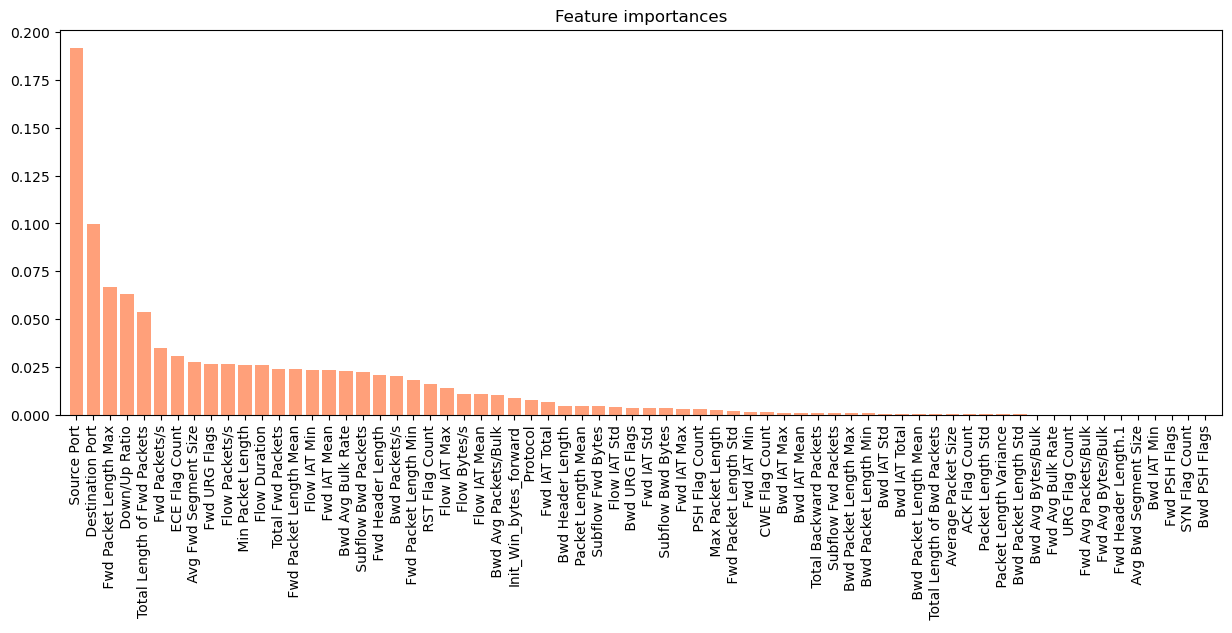

In [26]:
#plot most important features
plt.figure(figsize=(15,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), df.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

The 5 best features selected by the embedded feature selection method for the dataset are:

* Source Port 
* Destination Port
* Fwd Packet Length Max
* Bwd Packets/s 
* Down/Up Ratio

In [27]:
#select the best identified features
df4 = df1[[' Source Port', ' Destination Port',' Fwd Packet Length Max',' Bwd Packets/s',' Down/Up Ratio',' Label']]
df4 = df4.dropna()
df4.head()

,Source Port,Destination Port,Fwd Packet Length Max,Bwd Packets/s,Down/Up Ratio,Label
0,634,60495,440.0,0.0,0.0,DrDoS_DNS
1,634,60495,440.0,0.0,0.0,DrDoS_DNS
2,634,46391,440.0,0.0,0.0,DrDoS_DNS
3,634,11894,440.0,0.0,0.0,DrDoS_DNS
4,634,27878,440.0,0.0,0.0,DrDoS_DNS


In [28]:
#correlation between important features
corr2 = df4.corr()
corr2.style.background_gradient(cmap='coolwarm')

,Source Port,Destination Port,Fwd Packet Length Max,Bwd Packets/s,Down/Up Ratio
Source Port,1.000000,-0.094632,-0.536414,-0.001614,0.140069
Destination Port,-0.094632,1.000000,0.059878,0.004727,-0.162354
Fwd Packet Length Max,-0.536414,0.059878,1.000000,-0.045170,-0.226456
Bwd Packets/s,-0.001614,0.004727,-0.045170,1.000000,0.145398
Down/Up Ratio,0.140069,-0.162354,-0.226456,0.145398,1.000000


From the above results it can be observed that there is a low correlation between the selected features.

#### Random Forest Classifier with CICDDoS2019 Dataset

In [29]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X3=df4[[' Source Port', ' Destination Port',' Fwd Packet Length Max',' Bwd Packets/s',' Down/Up Ratio']]  # Features
y3=df4[' Label']  # Labels

# Split dataset into training set and test set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3) # 70% training and 30% test

In [30]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf3=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf3.fit(X_train3,y_train3)

y_pred3=clf3.predict(X_test3)

In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred3))

#other performance metrics
print(classification_report(y_test3,y_pred3))

Accuracy: 0.778530303030303
               precision    recall  f1-score   support

       BENIGN       0.99      1.00      0.99      4264
    DrDoS_DNS       0.78      0.80      0.79      5418
   DrDoS_LDAP       0.73      0.72      0.72      6060
  DrDoS_MSSQL       0.45      0.49      0.47      5981
    DrDoS_NTP       0.54      0.51      0.53      2280
DrDoS_NetBIOS       0.99      0.99      0.99      5989
   DrDoS_SNMP       1.00      1.00      1.00      5959
   DrDoS_SSDP       0.62      0.57      0.59      5957
    DrDoS_UDP       0.69      0.78      0.73      6011
          Syn       0.86      0.87      0.87      6047
         TFTP       0.87      0.86      0.86      5932
      UDP-lag       0.75      0.66      0.70      6102

     accuracy                           0.78     66000
    macro avg       0.77      0.77      0.77     66000
 weighted avg       0.78      0.78      0.78     66000



It can be observed that the RandomForest classifier on the features selected through
the use of embedded feature selection method on the CICDDoS2019 dataset has a high accuracy in attack detection.
The accuracy is 78%.
This accuracy is higher as compared to the Random forest classifier accuracy of the features selected through wrapper feature selection method.

#### Decision Tree Classifier with CICDDoS2019 Dataset

In [32]:
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [33]:
#target data
target2 = df4[' Label']
#label encoding
le = LabelEncoder()
target2 = le.fit_transform(target2)
target2

array([ 1,  1,  1, ..., 11, 11, 11])

In [34]:
#define
x3a = df4.iloc[:, 0:5].values
y3a = target2

In [35]:
# Splitting the data - 70:30 ratio
X_train3a, X_test3a, y_train3a, y_test3a = train_test_split(x3a , y3a, test_size = 0.3, random_state = 42)

In [36]:
# Defining the decision tree algorithm
from sklearn import tree
...
dtree2=DecisionTreeClassifier(max_depth=2, random_state=42)
dtree2.fit(X_train3a,y_train3a)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [37]:
# Predicting the values of test data
y_predd2 = dtree2.predict(X_test3a)
print(dtree2.score(X_test3a, y_test3a))#accuracy score of the decision tree
#other performance metrics
print(classification_report(y_test3a,y_predd2))

0.3593636363636364
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4232
           1       0.00      0.00      0.00      5397
           2       0.00      0.00      0.00      6021
           3       0.24      1.00      0.39      5906
           4       0.00      0.00      0.00      2353
           5       0.84      0.99      0.91      5977
           6       0.26      1.00      0.42      6010
           7       0.00      0.00      0.00      5923
           8       0.49      1.00      0.66      5925
           9       0.00      0.00      0.00      6176
          10       0.00      0.00      0.00      6069
          11       0.00      0.00      0.00      6011

    accuracy                           0.36     66000
   macro avg       0.15      0.33      0.20     66000
weighted avg       0.17      0.36      0.21     66000



It can be observed that the Decision tree classifier on the features selected through the use of embedded feature
selection method on the CICDDoS2019 dataset has a  very low accuracy in attack detection. The accuracy is 36 %. The accuracy is almost the same as the accuracy of the decision tree on features selected through wrapper maethod. This means that the decision tree is not reliable in the attack prediction.

### Best Classifier

The  best classifier is the **RandomForest Classifier**. This is because the accuracy obtained from the models based on the features selected through the two methods are very high as compared to the Decision Tree model accuracy.